In [ ]:
# Kaggle - Humble Intro to Analysis with Pandas and Seaborn
# https://www.kaggle.com/crawford/humble-intro-to-analysis-with-pandas-and-seaborn/

In [24]:
# Numpy is generally used for making fancier lists called arrays and series. 
import numpy as np 

# Pandas is super important, it's the foundation data analysis library we're using.
import pandas as pd 

# Matplotlib is the python plotting library and folks generally import it as "plt"
import matplotlib.pyplot as plt 

# Seaborn is a wrapper for Matplotlib and makes some things easier, generally imported as "sns"
import seaborn as sns

# Show plots inline
%matplotlib inline

In [ ]:
# Dataset location
database = 'data/database.csv'

# Read in a CSV file and store the contents in a dataframe (df)
# We're using the argument low_memory=False because this dataset has some funky datatypes and gives us a warning
df = pd.read_csv(database, low_memory=False)

In [8]:
# Start a basicdata.info() examination of the data
df.shape

(174104, 66)

In [37]:
# Get layout of data file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111175 entries, 0 to 111174
Data columns (total 8 columns):
Incident Year     111175 non-null int64
Incident Month    111175 non-null int64
Incident Day      111175 non-null int64
Operator          111175 non-null object
State             111175 non-null object
Airport           111175 non-null object
Flight Phase      111175 non-null object
Species Name      111175 non-null object
dtypes: int64(3), object(5)
memory usage: 6.8+ MB


In [39]:
# look at the distribution of the data
df.describe()

,Incident Year,Incident Month,Incident Day
count,111175.000000,111175.000000,111175.000000
mean,2005.144511,7.183450,15.722276
std,6.985854,2.819463,8.805770
min,1990.000000,1.000000,1.000000
25%,2000.000000,5.000000,8.000000
50%,2006.000000,8.000000,16.000000
75%,2011.000000,9.000000,23.000000
max,2015.000000,12.000000,31.000000


In [9]:
# Head() the dataframe
df.head(4)

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Tail
df.tail(4)

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,...,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49,...,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10,...,1,0,0,0,0,0,0,0,0,0
174103,365823,2015,9,30,AWI,AIR WISCONSIN AIRLINES,CRJ100/200,A,188,10,...,0,0,0,0,0,0,0,0,1,0


In [11]:
# Accessing the features (column names)
df.columns

Index(['Record ID', 'Incident Year', 'Incident Month', 'Incident Day',
       'Operator ID', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make',
       'Aircraft Model', 'Aircraft Mass', 'Engine Make', 'Engine Model',
       'Engines', 'Engine Type', 'Engine1 Position', 'Engine2 Position',
       'Engine3 Position', 'Engine4 Position', 'Airport ID', 'Airport',
       'State', 'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility',
       'Precipitation', 'Height', 'Speed', 'Distance', 'Species ID',
       'Species Name', 'Species Quantity', 'Flight Impact', 'Fatalities',
       'Injuries', 'Aircraft Damage', 'Radome Strike', 'Radome Damage',
       'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage',
       'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage',
       'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Strike', 'Propeller Damage',
       'Wing or Rotor Strike', 'Win

In [12]:
# Accessing the index (row names)
df.index

RangeIndex(start=0, stop=174104, step=1)

In [13]:
# Data Wrangling
# In this section I'm going to split the dataframe into a few manageable arrays for you to use when you're making plots.
# I'm going to remove all the rows that have any kind of Null value. These arrays will will be perfect for using as your x- and y-axes in the plots.
# Re-reading the data file to clean up NULL values that make ugly graphs
df = pd.read_csv(database,
                 low_memory=False,             ### Prevents low_memory warning
                 na_values=['UNKNOWN', 'UNK'], ### Adds UNKNOWN and UNK to list of NULLs
                 na_filter=True,               ### Detect NA/NaN as actual NULL values
                 skip_blank_lines=True)        ### Skip boring blank lines

In [14]:
# These are the columns we're going to take from the original dataframe
subset_list = ["Incident Year",
               "Incident Month",
               "Incident Day",
               "Operator",
               "State",
               "Airport", 
               "Flight Phase",
               "Species Name"]

# We're saving them into a new dataframe
df = pd.DataFrame(data=df, columns=subset_list)

# ...dropping NA's
df = df.dropna(thresh=8)

# ...and resetting the index 
df = df.reset_index(drop=True)

In [15]:
# Using the head() method to get just the first 10 operators
df["Operator"].value_counts().head(10)

BUSINESS              12290
SOUTHWEST AIRLINES    12080
AMERICAN AIRLINES      8627
MILITARY               7891
UNITED AIRLINES        7797
DELTA AIR LINES        5384
FEDEX EXPRESS          5250
1US AIRWAYS            3660
UPS AIRLINES           2936
SKYWEST AIRLINES       2762
Name: Operator, dtype: int64

## Plotting

We'll use these three methods to count the number of birdstrikes for each operator, then separate the data, and insert the separate arrays into the x- and y-axes:

    value_counts(): This is a method that counts how many times a thing shows up in the array. For example in the Operator column, it will return the Airline Operator names and how many times each one was counted. This will work for any of our columns, so keep that in mind. 


    get_values(): Returns all the unique values and the number of times they occur. 


    index: This was oe of the "Handy Data Exploration Methods" and is how we access the index of the dataframe.

In [16]:
# Plotting

# Get the numnber of occurances of each operator
operator_counts = df.Operator.value_counts()

# Split and Save the Operator names in a variable
operators = operator_counts.index

# Split and Save the counts in another variable
counts = operator_counts.get_values()

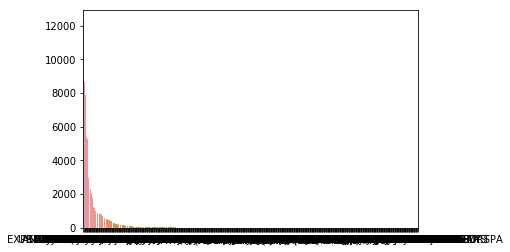

In [25]:
# Create barplot object
barplot = sns.barplot(x=operators, y=counts)

## Subsetting ¶
The plot above shows every single unique airline operator in the dataset and there are too many to fit on the plot. This is not something you should be proud of and certainly don't hang it up on your refrigerator. When this happens, you need to get creative and plot more specifically. One way to be more specific is to plot the first 5 or 10 by taking a "slice" or subset like this: x=operators[:10], y=counts[:10] 

There are many ways to filter the data, this is just a convenient one because they are sorted.

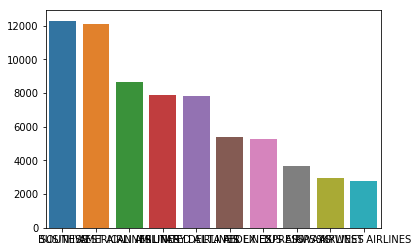

In [26]:
# Create barplot object with subsetted rows
barplot = sns.barplot(x=operators[:10], y=counts[:10])

# Rotating labels 
The barplot looks like a barplot now! But the labels are all on jumbled up so we don't want to start autographing and selling them yet.

This is how you rotate the 'xtick labels'

Play around with it! Try 90, 45, 30, 69, 1, -95, 420, -214. Try them all!

plt.xticks(rotation=90)

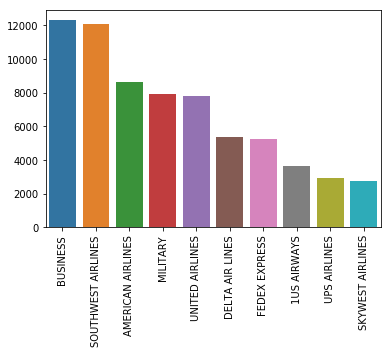

In [34]:
# Create barplot object
plt.xticks(rotation=90Changing the color palette ¶

### Color Palettes

The Seaborn colors look pretty cool by default and there are six variations of their default theme: deep, muted, pastel, bright, dark, and colorblind. You can use one of the Matplotlib or Seaborn built-in palettes or make your own. 


Make a list of colors:

my_palette = ["SlateGray", "CornflowerBlue", "PeachPuff", "MediumSeaGreen"]

Use sns.color_palette() to create a palette object

current_palette = sns.color_palette(my_palette)

and sns.set_palette() to set the palette and tell it how many colors you need (we want 10).

sns.set_palette(current_palette, 10) 


These websites show some of the different color schemes and are way more helpful than I'll ever be so take a look at them.

http://seaborn.pydata.org/tutorial/color_palettes.html

https://chrisalbon.com/python/seaborn_color_palettes.html)
barplot = sns.barplot(x=operators[:10], y=counts[:10])

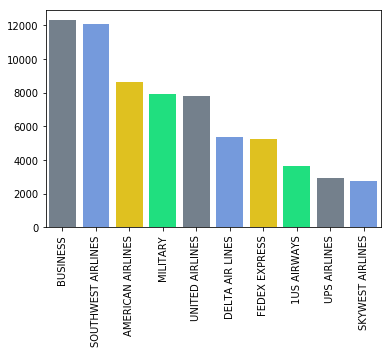

In [35]:
# Create and Set a color palette with ridiculous color names
my_palette = ["SlateGray", "CornflowerBlue", "Gold", "SpringGreen"]
current_palette = sns.color_palette(my_palette)
sns.set_palette(current_palette, 10)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Create the barplot object
barplot = sns.barplot(x=operators[:10], y=counts[:10])

### Main Titles and Axis Titles ¶
We're almost there! But what are we looking at exactly? We see some airlines and some kind of count of something. If your best friend walked in and saw this bargraph would they know what it meant? 


The answer is no, because we don't have titles. 


Last but not least, your plots MUST have proper titles! It has been shown in countless studies that plotters, charters, and fancy graphs makers make 200% more money than people that don't use plot titles. I made that up, I have no idea if that's true. Regardless, a person in your industry should be able to look at your plot and understand what the plot is saying! Pretty colors, graphics, and lines mean nothing without some description of what they represent.

Don't neglect your graphs - give them titles!

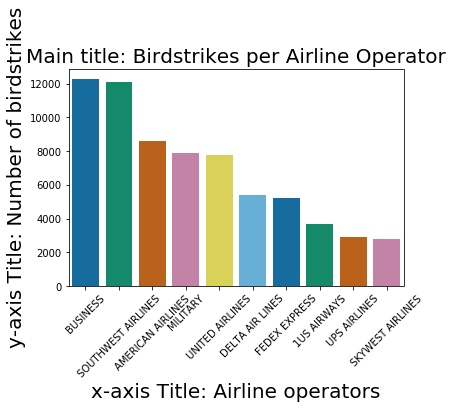

In [36]:
# Create and Set the color palette
paired_palette = sns.color_palette("colorblind")
sns.set_palette(paired_palette, 10)

# Rotate the x-labels
plt.xticks(rotation=45)

# Add the x-axis title
plt.xlabel("x-axis Title: Airline operators", fontsize=20)

# Add the y-axis title
plt.ylabel("y-axis Title: Number of birdstrikes", fontsize=20)

# Add the plot title
plt.title("Main title: Birdstrikes per Airline Operator", fontsize=20)

# Create the plot
barplot = sns.barplot(x=operators[:10], y=counts[:10])